In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
flightdf = pd.read_csv("flights.csv")

In [3]:
flightdf.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [4]:
# cleaning unrequired data since all we need exist in the columns left for the analysis
flightdf = flightdf.drop(["travelCode", "userCode"], axis = 1)

In [5]:
# check for null data in the dataframe
flightdf.isnull().sum()

from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [6]:
flightdf.head()

,from,to,flightType,price,time,distance,agency,date
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [7]:
len(flightdf)

271888

In [8]:
flightdf['from'].unique()

array(['Recife (PE)', 'Florianopolis (SC)', 'Brasilia (DF)',
       'Aracaju (SE)', 'Salvador (BH)', 'Campo Grande (MS)',
       'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)'],
      dtype=object)

In [9]:
flightdf['to'].unique()

array(['Florianopolis (SC)', 'Recife (PE)', 'Brasilia (DF)',
       'Salvador (BH)', 'Aracaju (SE)', 'Campo Grande (MS)',
       'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)'],
      dtype=object)

In [10]:
flightdf['flightType'].unique()

array(['firstClass', 'economic', 'premium'], dtype=object)

In [11]:
flightdf['agency'].unique()

array(['FlyingDrops', 'CloudFy', 'Rainbow'], dtype=object)

In [12]:
# creating categorical numerical equivalent for machine learning models
placeKeys = {
    'Recife (PE)': 0, 
    'Florianopolis (SC)': 1, 
    'Brasilia (DF)': 2,
    'Aracaju (SE)': 3, 
    'Salvador (BH)': 4, 
    'Campo Grande (MS)': 5,
    'Sao Paulo (SP)': 6, 
    'Natal (RN)': 7, 
    'Rio de Janeiro (RJ)': 8
}

flightTypeKeys = {
    'firstClass': 0, 
    'economic': 1, 
    'premium': 2
}

agencyKeys = {
    'FlyingDrops': 0, 
    'CloudFy' : 1, 
    'Rainbow': 2
}

monthKeys = {
    'FlyingDrops': 0, 
    'CloudFy' : 1, 
    'Rainbow': 2
}

In [13]:
def changeColumnsToCategorical(df, keys, columns):
    for column in columns:
        for index in range(0, len(df)):
            if(df[column][index] in keys):
                df[column][index] = keys.get(df[column][index])
    return df

In [14]:
def changeMonthToNumerical(df):
    for index in range(0, len(df)):
        df["date"][index] = df["date"][index].month
    return df

In [15]:
# convert string to datetime field for easier manipulation of date data.
flightdf["date"] = pd.to_datetime(flightdf["date"])
flightdf

,from,to,flightType,price,time,distance,agency,date
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10
...,...,...,...,...,...,...,...,...
271883,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,2020-07-12
271884,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,2020-07-16
271885,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,2020-07-20
271886,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,2020-07-23


In [16]:
flightdf = changeMonthToNumerical(flightdf)

C:\Users\danie\AppData\Local\Temp/ipykernel_17196/2495218488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"][index] = df["date"][index].month


In [17]:
# convert the columns from strings into categorical values with the keys
flightdf = changeColumnsToCategorical(flightdf, placeKeys, ["from", "to"])
flightdf = changeColumnsToCategorical(flightdf, flightTypeKeys, ["flightType"])
flightdf = changeColumnsToCategorical(flightdf, agencyKeys, ["agency"])

C:\Users\danie\AppData\Local\Temp/ipykernel_17196/1402055537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][index] = keys.get(df[column][index])


In [18]:
flightdf = changeColumnsToCategorical(flightdf, flightTypeKeys, ["flightType"])
flightdf = changeColumnsToCategorical(flightdf, agencyKeys, ["agency"])

In [19]:
# Convert columns to integer
flightdf["agency"] = flightdf["agency"].astype("int")
flightdf["from"] = flightdf["from"].astype("int")
flightdf["to"] = flightdf["to"].astype("int")
flightdf["flightType"] = flightdf["flightType"].astype("int")
flightdf["date"] = flightdf["date"].astype("int")
flightdf["distance"] = flightdf["distance"].astype("int")
flightdf["time"] = flightdf["time"].astype("int")
flightdf["price"] = flightdf["price"].astype("int")

In [20]:
flightdf.head()

,from,to,flightType,price,time,distance,agency,date
0,0,1,0,1434,1,676,0,9
1,1,0,0,1292,1,676,0,9
2,2,1,0,1487,1,637,1,10
3,1,2,0,1127,1,637,1,10
4,3,4,0,1684,2,830,1,10


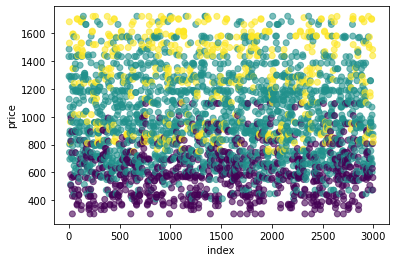

In [21]:
plt.xlabel("index")
plt.ylabel("price")
plt.scatter(flightdf[0:3000].index, flightdf[0:3000]["price"], c = flightdf[0:3000]["time"], alpha = 0.6)

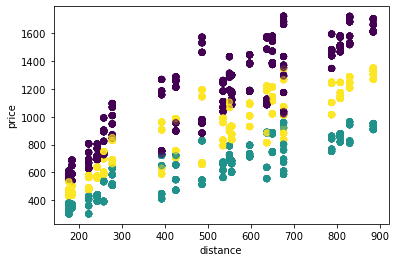

In [22]:
plt.xlabel("distance")
plt.ylabel("price")
plt.scatter(flightdf[0:10000]["distance"], flightdf[0:10000]["price"],  c = flightdf[0:10000]["flightType"], alpha = 0.5)

In [23]:
# We can turn off the interactive plot using %matplotlib inline
%matplotlib notebook

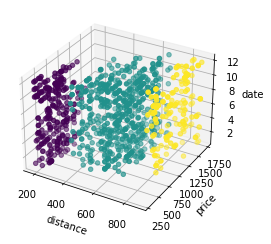

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel("distance")
ax.set_ylabel("price")
ax.set_zlabel("date")

ax.scatter(flightdf[0:1000]["distance"], flightdf[0:1000]["price"],  flightdf[0:1000]["date"], c = flightdf[0:1000]["time"])


In [25]:
%matplotlib inline

In [26]:
flightdf.shape

(271888, 8)

In [27]:
flightdf[flightdf.duplicated()].count()

from          266008
to            266008
flightType    266008
price         266008
time          266008
distance      266008
agency        266008
date          266008
dtype: int64

In [28]:
flightdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   from        271888 non-null  int32
 1   to          271888 non-null  int32
 2   flightType  271888 non-null  int32
 3   price       271888 non-null  int32
 4   time        271888 non-null  int32
 5   distance    271888 non-null  int32
 6   agency      271888 non-null  int32
 7   date        271888 non-null  int32
dtypes: int32(8)
memory usage: 8.3 MB


In [29]:
# Non-duplicate items
271888 - 266008

5880

In [30]:
flightdf.describe()

,from,to,flightType,price,time,distance,agency,date
count,271888.000000,271888.000000,271888.000000,271888.000000,271888.000000,271888.000000,271888.000000,271888.000000
mean,3.367361,3.367361,0.858714,956.873179,0.953650,546.402202,1.286861,6.607519
std,2.476507,2.476507,0.833740,362.308203,0.625917,208.805727,0.699769,3.606611
min,0.000000,0.000000,0.000000,301.000000,0.000000,168.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,672.000000,1.000000,401.000000,1.000000,3.000000
50%,3.000000,3.000000,1.000000,904.000000,1.000000,562.000000,1.000000,7.000000
75%,5.000000,5.000000,2.000000,1222.000000,1.000000,676.000000,2.000000,10.000000
max,8.000000,8.000000,2.000000,1754.000000,2.000000,937.000000,2.000000,12.000000


In [31]:
flightdf.corr()

,from,to,flightType,price,time,distance,agency,date
from,1.000000,-0.198067,0.002324,0.011820,-0.189659,-0.226095,0.001484,0.001075
to,-0.198067,1.000000,0.002324,-0.271367,-0.189659,-0.226095,0.001484,0.003814
flightType,0.002324,0.002324,1.000000,-0.352248,0.002125,0.002173,0.315986,-0.000286
price,0.011820,-0.271367,-0.352248,1.000000,0.571745,0.641884,-0.192272,-0.000015
time,-0.189659,-0.189659,0.002125,0.571745,1.000000,0.925108,-0.004610,0.000340
distance,-0.226095,-0.226095,0.002173,0.641884,0.925108,1.000000,-0.003166,0.000947
agency,0.001484,0.001484,0.315986,-0.192272,-0.004610,-0.003166,1.000000,0.002784
date,0.001075,0.003814,-0.000286,-0.000015,0.000340,0.000947,0.002784,1.000000


<AxesSubplot:>

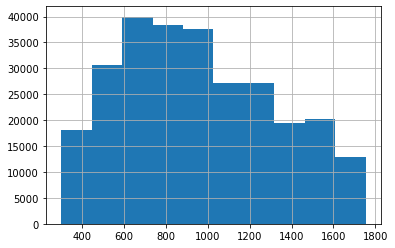

In [32]:
flightdf["price"].hist()

<AxesSubplot:>

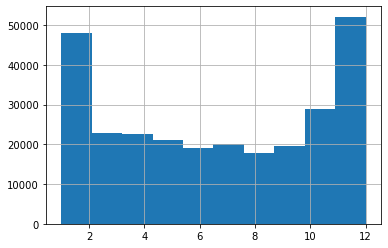

In [33]:
flightdf["date"].hist()

<AxesSubplot:>

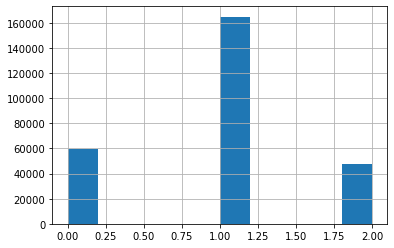

In [34]:
flightdf["time"].hist()

<AxesSubplot:>

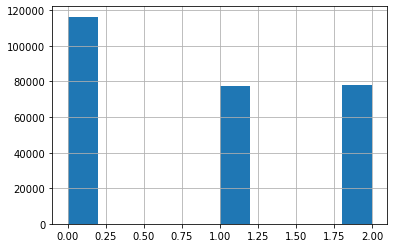

In [35]:
flightdf["flightType"].hist()

In [36]:
flightdf.head()

,from,to,flightType,price,time,distance,agency,date
0,0,1,0,1434,1,676,0,9
1,1,0,0,1292,1,676,0,9
2,2,1,0,1487,1,637,1,10
3,1,2,0,1127,1,637,1,10
4,3,4,0,1684,2,830,1,10


In [37]:
flightdf.columns

Index(['from', 'to', 'flightType', 'price', 'time', 'distance', 'agency',
       'date'],
      dtype='object')

In [38]:
targetColumn = ['from', 'to', 'flightType', 'time', 'distance', 'agency',
       'date']

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(flightdf[targetColumn], flightdf["price"], train_size=0.80)


In [40]:
dir(x_train)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex

In [44]:
# Multiple classifier trial and error to find the best fit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(4),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print()
    
    #log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    #log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 99.9834%
Log Loss: 0.0002895543063687392
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 4.1179755507902045e-13
RandomForestClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 3.4350429681991445e-05
GaussianNB
****Results****
Accuracy: 85.7847%
Log Loss: 0.8728104399515274
LinearDiscriminantAnalysis
****Results****
Accuracy: 77.9782%
Log Loss: 2.1333186696115236
